In [1]:
import numpy as np
import pandas as pd

import ast
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import gensim  
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.lda_model
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
# Test different numbers of topics using coherence scores

# Initialize an empty list to store coherence scores
coherence_scores = []

# Test different numbers of topics (with a step of 5)
for num_topics in tqdm(range(5, 41, 5)):
    
    # Split the preprocessed text data into a list of words for each document
    documents = df["Lyric"].apply(lambda x: x.split())
    
    # Create a Gensim dictionary (word to ID mapping)
    dictionary = gensim.corpora.Dictionary(documents)
    
    # Create a Gensim corpus (a collection of bags of words for each document)
    corpus = [dictionary.doc2bow(doc) for doc in documents]

    # Train an LDA model using Gensim
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary,random_state=100)
    
    # Calculate the coherence score for the current model
    coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    
    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Print the list of coherence scores
print("Coherence Scores:", coherence_scores)

100%|██████████| 8/8 [1:45:01<00:00, 787.74s/it]

Coherence Scores: [0.3772143734282781, 0.37872256793182063, 0.3843789923478336, 0.3642550553405214, 0.3600543106754632, 0.3584883403548964, 0.3534156298923965, 0.3496990225278006]


In [ ]:
# Test and plot different numbers of topics
num_topics_range = range(5, 41, 5)

plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores vs. Number of Topics")
plt.grid(True)
plt.show()

In [5]:
# Apply LDA using 10 topics 

# Apply Count Vectorization
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df["Lyric"])

In [6]:
# Apply LDA 
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=42)
data_lda = lda.fit_transform(data_vectorized)

In [7]:
# Print the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

Topic #1: love, heart, know, feel, let, want, need, away, hold, fall, time, find, way, cry, eye, break, baby, leave, dream, believe
Topic #2: money, ride, hit, car, kid, pay, wit, buy, street, work, gettin, shot, bout, city, talkin, straight, bag, roll, pull, dollar
Topic #3: baby, girl, let, wanna, get, little, boy, dance, want, like, come, rock, tonight, night, shake, body, go, right, play, party
Topic #4: man, black, big, gun, shoot, cut, dog, kill, dead, white, eat, blow, kick, red, head, blood, murder, wear, brain, send
Topic #5: run, burn, world, fire, free, hand, man, break, fall, save, fight, set, stand, wall, watch, feel, end, ground, deep, power
Topic #6: night, day, light, dream, sky, sun, eye, sing, come, high, song, star, fly, hear, away, rain, shine, time, blue, rise
Topic #7: know, go, get, time, think, way, tell, good, thing, say, want, right, look, try, feel, well, day, mind, leave, find
Topic #8: come, wait, home, stop, turn, lonely, ready, round, go, long, slow, lyri

In [8]:
# Write the top words for each topic into a txt file
output_file_path = "lda_top_words_per_topic_without_weights.txt"
with open(output_file_path, "w") as file:
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]
        file.write(f"Topic #{topic_idx + 1}: {', '.join(top_words)}\n")

In [9]:
# Print the top words for each topic and their weights
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_with_weights = [(feature_names[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
    print(f"Topic #{topic_idx + 1}:")
    for word, weight in top_words_with_weights:
        print(f"{word} ({round(weight, 3)})", end=", ")
    print()

Topic #1:
love (293907.163), heart (76697.959), know (74606.768), feel (73158.581), let (60951.086), want (57937.832), need (54743.847), away (43094.941), hold (38826.48), fall (29706.108), time (23863.157), find (22487.2), way (22453.154), cry (22292.237), eye (21820.877), break (21442.797), baby (21257.595), leave (21082.368), dream (20748.693), believe (20335.548), 
Topic #2:
money (29374.858), ride (12795.443), hit (12238.466), car (10848.401), kid (9915.423), pay (9741.617), wit (9468.947), buy (8581.174), street (8357.358), work (8081.819), gettin (7458.45), shot (6845.683), bout (6783.379), city (6720.65), talkin (6281.619), straight (6240.726), bag (5448.279), roll (5412.917), pull (5062.641), dollar (5032.064), 
Topic #3:
baby (85090.882), girl (76941.135), let (58851.254), wanna (50729.59), get (46795.839), little (34007.903), boy (28240.827), dance (28006.843), want (27745.806), like (25411.647), come (24669.881), rock (24605.432), tonight (23266.14), night (18436.632), shak

In [10]:
# Write the top words and thier weights into a txt file
output_file_path = "lda_top_words_per_topic_with_weights.txt"
with open(output_file_path, "w") as file:
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        top_words_with_weights = [(feature_names[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
        file.write(f"Topic #{topic_idx + 1}:\n")
        file.write(", ".join([f"{word} ({round(weight, 3)})" for word, weight in top_words_with_weights]))
        file.write("\n")

In [11]:
# Plot top words
def plot_top_words(model, feature_names, n_top_words=10):
  fig, axes = plt.subplots(2, 5, figsize=(40, 18), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=25)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)
    fig.suptitle('LDA: Top Words', fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.80, hspace=0.2)
  plt.show()

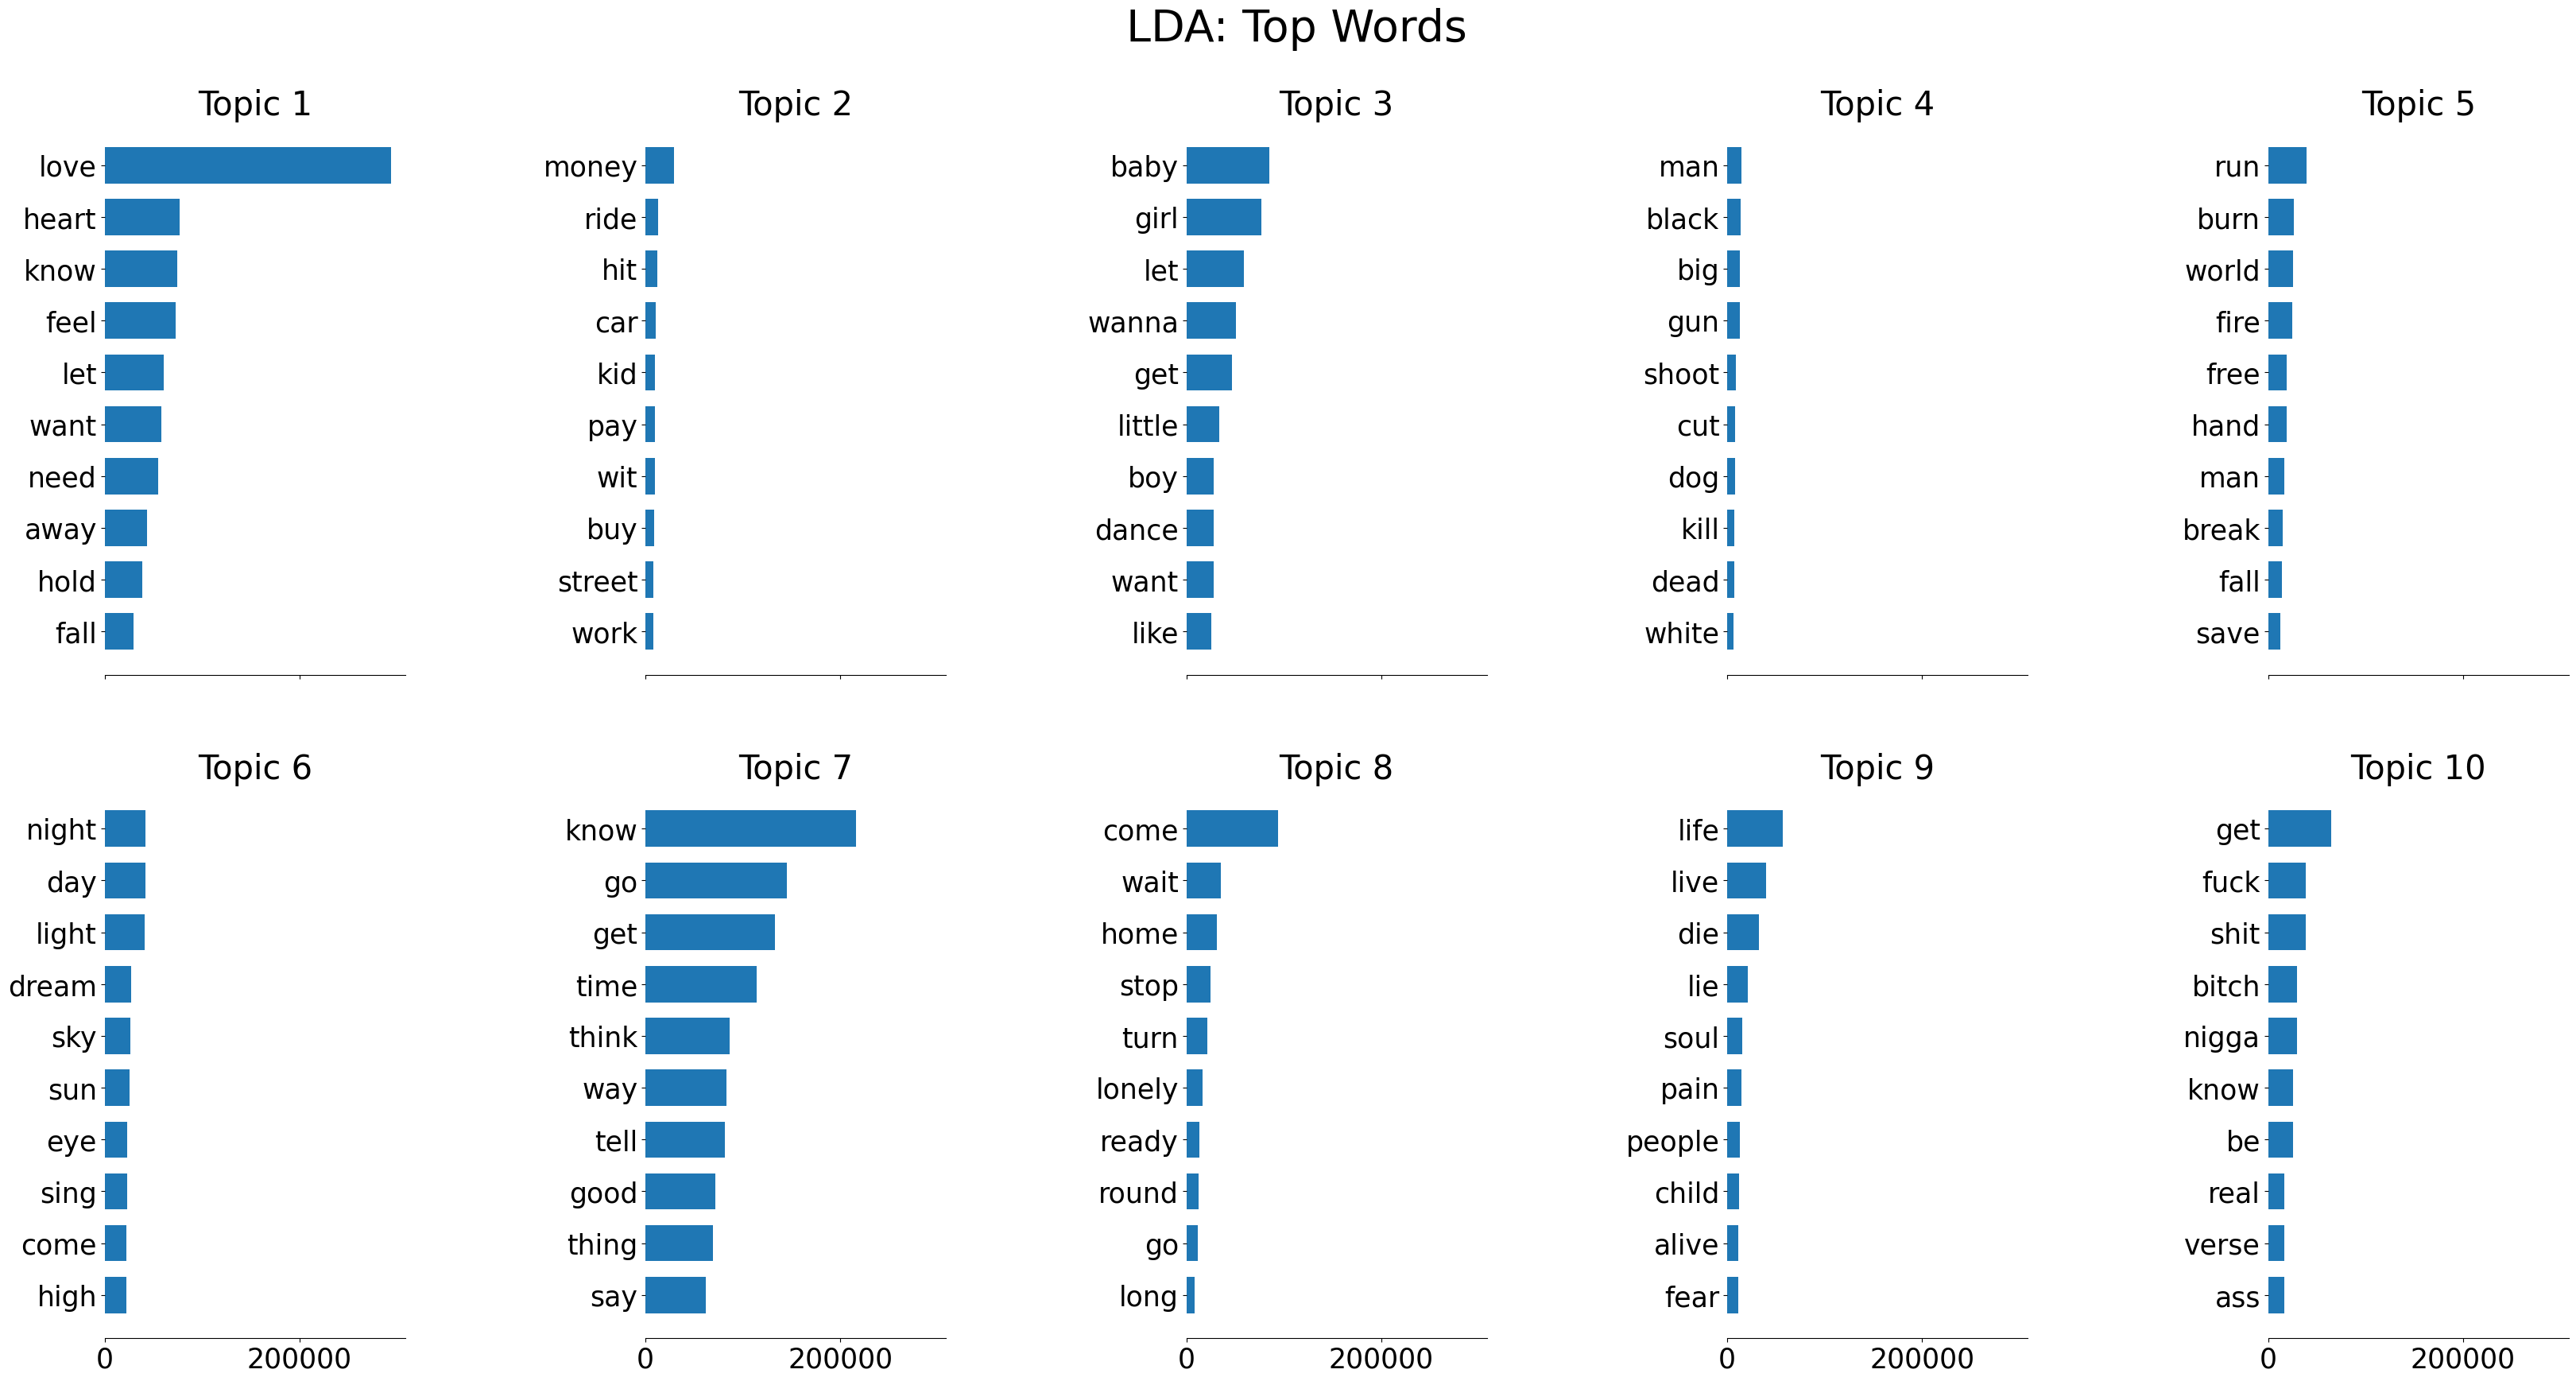

In [12]:
feature_names = vectorizer.get_feature_names_out()
plot_top_words(lda, feature_names)

In [13]:
# Visualize with pyLDAvis
pyLDAvis.enable_notebook()
plot_lda = pyLDAvis.lda_model.prepare(lda, data_vectorized, vectorizer, mds='tsne')
plot_lda

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6     -20.510965  12.756900       1        1  23.380426
0      -4.552080 -12.102284       2        1  14.043431
5      48.385098  -8.784330       3        1  11.891176
8      21.683283 -15.445374       4        1  10.578583
2      36.797279  20.302103       5        1   9.271195
9     -30.004908 -20.497118       6        1   9.212187
4      -0.771046 -40.635773       7        1   6.814851
3       3.663217  34.966156       8        1   6.039898
1      11.464685   9.040287       9        1   5.704114
7      31.523609 -40.849987      10        1   3.064139, topic_info=           Term           Freq          Total Category  logprob  loglift
46529      love  299293.000000  299293.000000  Default  30.0000  30.0000
15497      come  197960.000000  197960.000000  Default  29.0000  29.0000
32765       get  249972.000000  249972.000000  Default  28.0000  28.0000
5243       baby  110417.000000  110417.000000  Default  27.0000  27.0000
43757      know  321921.000000  321921.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
33588        go   11541.783508  194272.248539  Topic10  -3.7708   0.6621
38266      hour    2379.836728    8159.029767  Topic10  -5.3497   2.2533
8871       bomb    1626.705786    4407.009321  Topic10  -5.7302   2.4888
14788     clock    1516.107097    3440.148980  Topic10  -5.8006   2.6660
81995  tomorrow    1805.130011   11939.089964  Topic10  -5.6261   1.5962

[739 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
233        1  0.999238      able
1530       1  0.998376       ahh
1965      10  0.998982     alien
2000       3  0.105602     alive
2000       4  0.748834     alive
...      ...       ...       ...
91354      7  0.000649     wrong
91800      2  0.996391  yearning
92045      9  0.999373        yo
92269      4  0.999629     youth
92618     10  0.997320      zoom

[1986 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 6, 9, 3, 10, 5, 4, 2, 8])

In [14]:
pyLDAvis.save_html(plot_lda, 'topics_lda.html')

In [15]:
# Add LDA model results to the DataFrame
for i in range(num_topics):
    df[f'Topic {i+1}'] = data_lda[:, i]

In [16]:
# Display the DataFrame
df

Artist                               Genres  \
0       Ivete Sangalo          ['Pop', 'Axé', 'Romântico']   
1       Ivete Sangalo          ['Pop', 'Axé', 'Romântico']   
2       Ivete Sangalo          ['Pop', 'Axé', 'Romântico']   
3       Ivete Sangalo          ['Pop', 'Axé', 'Romântico']   
4       Ivete Sangalo          ['Pop', 'Axé', 'Romântico']   
...               ...                                  ...   
191293   Johnny Clegg  ['World Music', 'Gospel/Religioso']   
191294   Johnny Clegg  ['World Music', 'Gospel/Religioso']   
191295   Johnny Clegg  ['World Music', 'Gospel/Religioso']   
191296   Johnny Clegg  ['World Music', 'Gospel/Religioso']   
191297   Johnny Clegg  ['World Music', 'Gospel/Religioso']   

                                                    Lyric   Topic 1   Topic 2  \
0       feel unsure hand lead dance floor music die ey...  0.076873  0.000855   
1       let fool try school get mind hell think right ...  0.656448  0.002222   
2       baby let cruise away confuse way clear want ge...  0.335918  0.001724   
3       know sound funny stand pain leave tomorrow gir...  0.041547  0.001887   
4       get look hope lad face beam smile get boast pu...  0.175725  0.001493   
...                                                   ...       ...       ...   
191293  chorus stand wait plain darkness take outpost ...  0.109240  0.001266   
191294  nearly disappear mouth crocodile nearly touch ...  0.069592  0.002041   
191295  amambuka lakithi betrayer betrayer sell land l...  0.001137  0.001136   
191296  sweat heat day end wait come hear word spill l...  0.148466  0.001087   
191297  stand edge day face melt african rain season s...  0.088399  0.000848   

         Topic 3   Topic 4   Topic 5   Topic 6   Topic 7   Topic 8   Topic 9  \
0       0.241566  0.000855  0.000855  0.081937  0.517245  0.000855  0.078105   
1       0.002223  0.002222  0.002223  0.002223  0.002223  0.002223  0.165596   
2       0.226336  0.001725  0.018939  0.055893  0.354293  0.001724  0.001724   
3       0.001888  0.001887  0.074931  0.108190  0.711349  0.054547  0.001888   
4       0.001493  0.152760  0.001493  0.144912  0.450803  0.001493  0.068336   
...          ...       ...       ...       ...       ...       ...       ...   
191293  0.001266  0.056940  0.143812  0.073713  0.082805  0.186781  0.342911   
191294  0.002041  0.110301  0.002041  0.294848  0.266661  0.248392  0.002041   
191295  0.001137  0.096954  0.249765  0.130312  0.154309  0.051151  0.312962   
191296  0.001087  0.001087  0.091802  0.199869  0.044635  0.062402  0.448478   
191297  0.012000  0.062104  0.074146  0.271874  0.164818  0.016674  0.308291   

        Topic 10  
0       0.000855  
1       0.162398  
2       0.001724  
3       0.001887  
4       0.001493  
...          ...  
191293  0.001266  
191294  0.002041  
191295  0.001137  
191296  0.001087  
191297  0.000848  

[191298 rows x 13 columns]

In [ ]:
# Save the result into a csv file
df.to_csv('lda_topic_distribution.csv', index=False)